This Jupyter notebook will focus on developing prediction models to predict car price using variables or features.  
We often use model development to help us predict future observations from data we have

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(filepath)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


LINEAR REGRESSION AND MULTIPLE LINEAR REGRESSION  
SIMPLE LINEAR REGRESSION  
Is a method that help us understand relationship between two variables. The independant variable and the dependant variable. 
##### The result of simple linear regression is a linear function that predicts the response(dependant) variable as a function of predictor(independant) variable.  
Linear function: yhat = a + bx  
Here 'a' is the intercept of regression line, which means value of y when x = 0  
And 'b' is the slope, which means the value with which y changes when x increases by 1 unit  

In [102]:
# loading the modules for linear regression
from sklearn.linear_model import LinearRegression

# create linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [103]:
# How can 'highway-mpg' help us predict car price? 
# Using simple linear regression we will make a linear function with highway-mpg as predictor and price as response variable
X=df[['highway-mpg']]
Y=df['price']

In [104]:
# Now fit the model using highway-mpg
lm.fit(X,Y)


LinearRegression()

In [105]:
# Now we can output a prediction 
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [106]:
# Finding value of intercept
lm.intercept_

38423.3058581574

In [107]:
# Finding the value of slope b
lm.coef_

array([-821.73337832])

In [108]:
# The final estimated linear model we get is :
# Yhat = 38423.30 -821.73 X 
#or
# price = 38423.30 - 821.73 * highway-mpg

In [109]:
# Linear regression model using engine size 
lm1 = LinearRegression()
X=df[['engine-size']]
Y=df['price']
lm1.fit(X,Y)
print(lm1.intercept_)
print(lm1.coef_)
print('The equation of predicted line is ', 'Price = ', lm1.intercept_, '+',lm1.coef_ ,'* Engine size' )

-7963.338906281024
[166.86001569]
The equation of predicted line is  Price =  -7963.338906281024 + [166.86001569] * Engine size


MULTIPLE LINEAR REGRESSION  
To predict the car price using more than one variable we use multiple linear regression.  
It is similar to simple linear regression, the only difference is that instead of one predictor variable we have multiple predictor variables.  
The equation is given by: Yhat = a + b1X1 + b2X2 + b3X3 + b4X4  
Develop a model using these 4 variables: Horsepower, Curb-weight, Engine-Size, Highway-mpg


In [147]:
Z = df[['horsepower','curb-weight','engine-size','highway-mpg']]
#now fit the model using these 4 variables
lm1.fit(Z,Y)

LinearRegression()

In [111]:
# What is the value of intercept a?
lm1.intercept_

-15806.624626329227

In [112]:
# What is the value of coefficients b1, b2, b3 and b4?
lm1.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [113]:
# The equation we get is Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

In [114]:
# Create and train multiple linear regression model lm2 where predictor variable is normalized-losses and highway-mpg
lm2 = LinearRegression()
Z= df[['normalized-losses','highway-mpg']]
lm2.fit(Z,Y)
print(lm2.intercept_)
print(lm2.coef_)
# The multiple linear equation that we get here is :( Price = 38201.31 + 1.49 * normalized-losses - 820.45 * highway-mpg)

38201.31327245728
[   1.49789586 -820.45434016]


Now that we have created many models how to figure out the best one? This can be done using visualization. 

Regression Plot  
The best way to visualize the fit for simple linear regression models is through regression plots.  
The plot will show combination of scattered data points as well as fitted regression line going through data.  
This will give us reasonable estimate of relationship between two variables, strength of correlation, as well as the direction(positive or negative)

(0.0, 48158.712057748344)

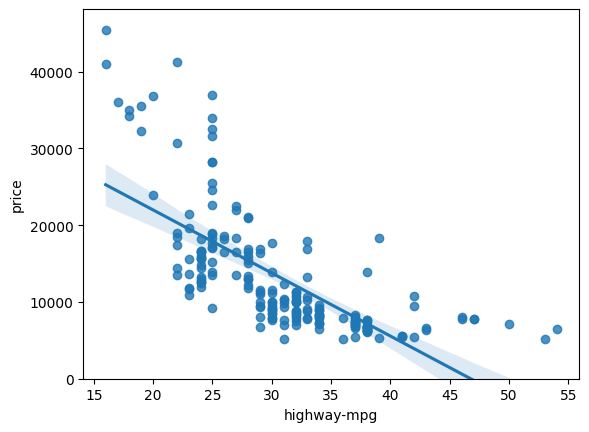

In [115]:
# Lets visualize highway-mpg as potential predictor variable of price

sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

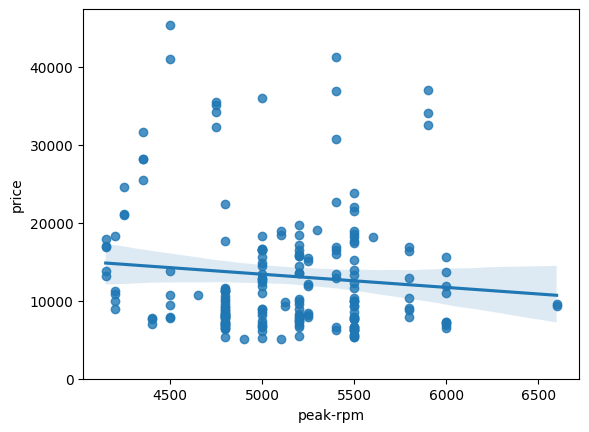

In [116]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [117]:
# Finding the correlation
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


Residual Plot: A good way to visualize variance of data is through residual plot.  
What is a residual?  
The difference between the observed value(y) and the predicted value(yhat) is called the residual(e).  
When we look at the regression plot, the residual is the distance from data point to fitted line of regression.  
So what is Residual Plot?  
A residual plot is a graph that shows residuals on vertical y-axis and independant variable on horizontal x-axis.  
What do we pay attention to while looking at a residual plot? We look at the spread of residuals.  
That means if the residual plot are randomly spread around x-axis it means linear model is appropriate for the data. Randomly spread out residuals mean that the variance is constant, thus the linear model is good fit for data

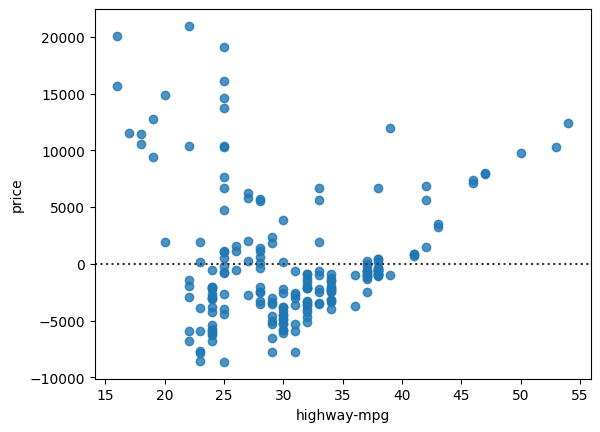

In [118]:
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()
#In this model we can see the the residuals are not randomly spread around x-axis, leading us to believe that maybe a non-linear model is more appropriate
# for this data

The best way to visualize MULTIPLE LINEAR REGRESSION MODEL is through DISTRIBUTION PLOT.  
We can look at distribution of fitted values that result from the model and compare it to distribution of actual values

In [119]:
#lets first make a prediction
Y_hat = lm2.predict(Z)


C:\Users\16474\AppData\Local\Temp\ipykernel_22944\788976769.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\16474\AppData\Local\Temp\ipykernel_22944\788976769.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

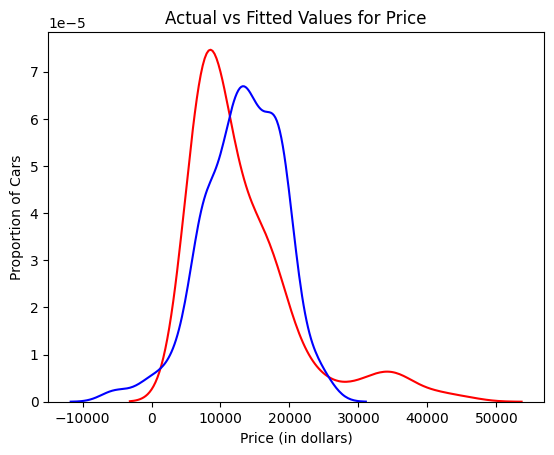

In [120]:
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#### POLYNOMIAL REGRESSION  
Is a particular case of general linear regression model or multiple linear regression model.  
We get non- linear relationships by squaring or setting higher order terms of predictor variables  
There are different orders of polynomial regression: Quadric 2nd order, Cubic: 3rd order and Higher order.  
We earlier saw that linear model does not provide best fit when using highway-mpg. Lets see if we can try fitting a polynomial model instead.

In [121]:
# We will be using the following function to plot the data 
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [122]:
#getting the variables
x = df['highway-mpg']
y = df['price']

In [123]:
# lets fit the polynomial using polyfit function, then use function poly1d to display the polynomial function.
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


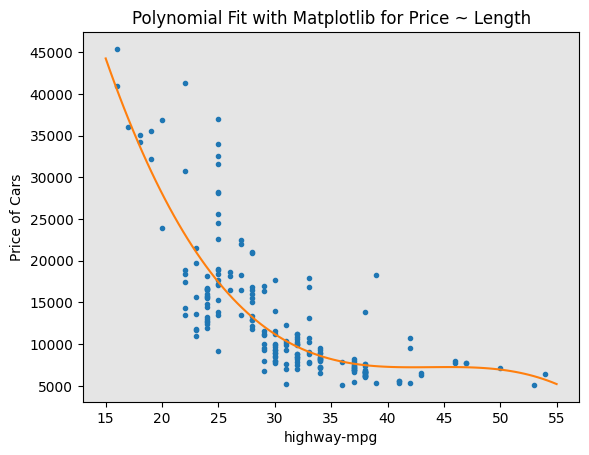

In [124]:
PlotPolly(p, x, y, 'highway-mpg')

In [125]:
np.polyfit(x, y, 3)
# We can already see from plotting that this polynomial model performs better than the linear model, this is because the generated polynomial function hits
# more of the data points.

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [126]:
#Creating a 11 order polynomial model with variables x and y
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
p1

poly1d([-1.24263392e-08,  4.72184894e-06, -8.02843484e-04,  8.05640306e-02,
       -5.29740982e+00,  2.39470330e+02, -7.58845742e+03,  1.68447254e+05,
       -2.56531153e+06,  2.55140623e+07, -1.49106965e+08,  3.87930088e+08])

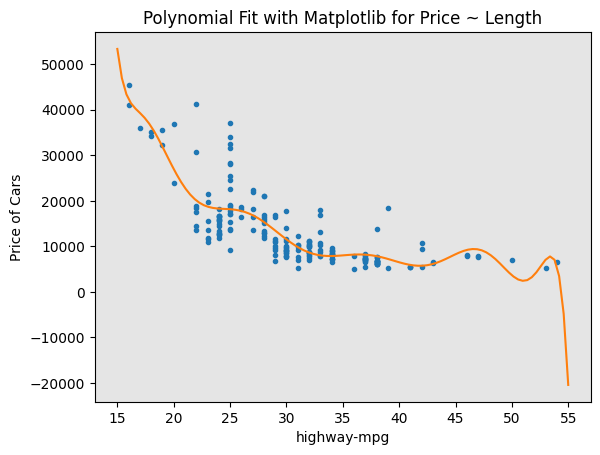

In [127]:
PlotPolly(p1, x, y, 'highway-mpg')

We can perform polynomial transform on multiple features.

In [128]:
from sklearn.preprocessing import PolynomialFeatures
# we create a PolynomialFeature object of degree 2
pr = PolynomialFeatures(degree=4)
pr

PolynomialFeatures(degree=4)

In [129]:
Z_pr=pr.fit_transform(Z)

In [130]:
# in original data there are 201 samples and  features
Z.shape

(201, 2)

In [131]:
Z_pr.shape

(201, 15)

PIPELINES  
Data pipelines simplfy the steps of processing the data.  
We use module Pipeline to create a pipeline.  
We also use StandardScaler as a step in our pipeline. 

In [132]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# we create the pipeline by creating a list of tuples including name of model or estimator and its corresponding constructor
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
# We input the list as argument to the pipeline constructor
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [133]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [134]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([15388.77780567, 15388.77780567, 16771.84474515, 11641.85647791])

MEASURES FOR IN SAMPLE EVALUATION  
It is not only important to visualize the accuracy of model but to also want a qauntative measure to determine how accurate the model is.  
Two very important measures which is often used in Statistics to determine the accuracy of model are:  
R-squared  
Also known as coefficient of determination is a measure to indicate how close the data is to fitted line of regression.
Mean Squared Error  
Measures average of squares of error. That is difference between actual value y and predicted value yhat  


In [140]:
# MODEL 1 SIMPLE LINEAR REGRESSION
# highway_mpg_fit

lm.fit(df[['highway-mpg']],df['price'])
lm.score(df[['highway-mpg']],df['price'])
# This is r-squared- which means 49.659 percent of variation of price is explained by highway-mpg

0.4965911884339176

In [142]:
# now lets find mean squared
from sklearn.metrics import mean_squared_error
# We can predict the output yhat using predict method where X in input variable
yhat = lm.predict(df[['highway-mpg']])
# Output of first four predicted value
yhat[0:4]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ])

In [144]:
# We can compare the predicted results with actual results
mse = mean_squared_error(df['price'],yhat)
mse

31635042.944639888

In [149]:
# MODEL 2 MULTIPLE LINEAR REGRESSION
# Lelts calculate R2
lm1.fit(Z,Y)
lm1.score(Z,Y)
# Hence we can say that 80.93 percent of variation of price is explained by these variables

0.8093562806577457

In [152]:
# Finding mse
Y_hat = lm1.predict(Z)
Y_hat[0:4]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015])

In [155]:
mse = mean_squared_error(df['price'],Y_hat)
mse

11980366.87072649

In [158]:
# MODEL 3 POLYNOMIAL FIT
# lets import the function r2_score from module metrics because we are using different function
from sklearn.metrics import r2_score
rsquared = r2_score(Y,p(x))
rsquared
# Hence we can say that 67.41 percent of variation of price is explained by this polynomial fit

0.674194666390652

In [159]:
# Calculating MSE
mean_squared_error(Y,p(x))

20474146.426361207

PREDICTION AND DESICION MAKING   
Previously we trainned the model using fit  
Now we will use method predict to make a prediction  



In [160]:
# create a new input
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [161]:
lm.fit(X, Y)
lm

LinearRegression()

In [162]:
yhat=lm.predict(new_input)
yhat[0:5]

C:\Users\16474\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

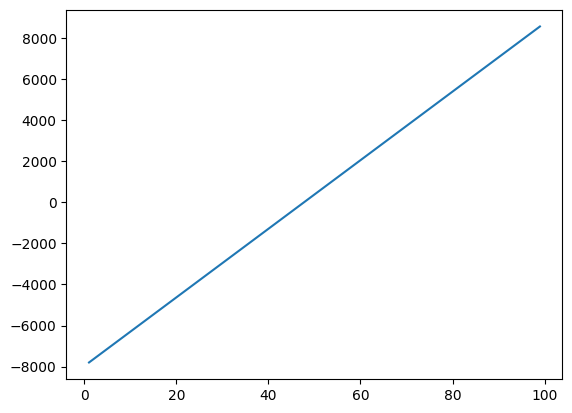

In [163]:
plt.plot(new_input, yhat)
plt.show()

DETERMINING A GOOD MODEL FIT  
How do we determine a good model fit?  
THE MODEL WITH HIGHER R-Squared IS A GOOD FIT  
THE MODEL WITH SMALLEST MSE IS A GOOD FIT